In [1]:
from os import listdir
from os.path import isfile, join
import re
import numpy as np
from matplotlib import pyplot as plt
path = "C:\\Users\\Jeppe Holt\\Desktop\\IntelPower"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [2]:
def ExtractJoules(data):
    regex = "Cumulative Processor Energy_0 \(Joules\) = \d*"
    x = re.findall(regex,data)
    try:
        return int(re.findall("\d*",x[0])[-2])
    except:
        return 0

In [3]:
dict = {}
for file in files:
    with open(path+"\\"+file, 'r') as file:
        data = file.read().replace('\n', '')
        dict[file] = ExtractJoules(data)

In [4]:
Invalid = {}
Valid = {}
for key in dict.keys():
    if(dict[key] > 100):
        Valid[key] = dict[key]
    else:
        Invalid[key] = dict[key]
print("Valid Measurements: " + str(len(Valid)))
print("Invalid Measurements: " + str(len(Invalid)))


Valid Measurements: 614
Invalid Measurements: 702


In [5]:
#for entry in Invalid.keys():
    #print(entry.name+": "+str(Invalid[entry]))


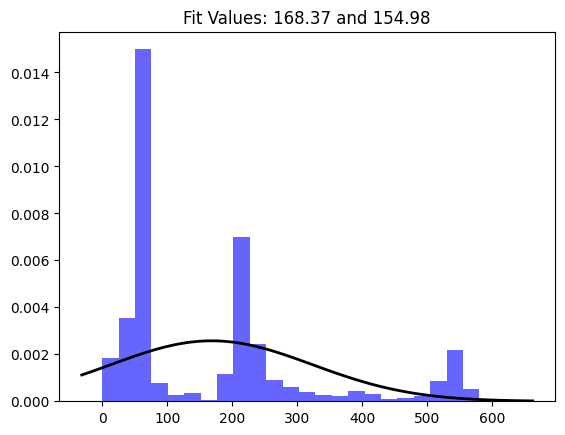

In [6]:
NumData = []
for key in dict.keys():
    NumData.append(dict[key])

from scipy.stats import norm
import statistics
    
# Plot between -30 and 30 with
# 0.1 steps.
# x_axis = np.arange(0, 600, 0.1)
    
# Calculating mean and standard 
# deviation
# mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
    
# plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
# plt.show()



NumData.sort()
NumData = NumData[:-2]
mu, std = norm.fit(NumData) 


plt.hist(NumData, bins=25, density=True, alpha=0.6, color='b')
# plt.ylabel('some numbers')
# plt.show()
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()